## SVM Model

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score, balanced_accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
train_path = '../../feature_extracted_data/training_features_01.csv'
train_data = pd.read_csv(train_path)

In [4]:
train_label_path = '../../extracted_data/train_labels_full_with_columns.csv'
train_labels = pd.read_csv(train_label_path)

In [6]:
test_data = pd.read_csv("../../feature_extracted_data/test_features_01.csv")
test_labels = pd.read_csv("../../extracted_data/test_labels_full_with_columns.csv")

### Combine with original data & feature extracted

In [10]:
original_train_data = pd.read_csv("../../extracted_data/training_data_full_with_columns.csv")
original_test_data = pd.read_csv("../../extracted_data/test_data_full_with_columns.csv")
merged_train_df = pd.concat([original_train_data, train_data], axis=1)
merged_test_df = pd.concat([original_test_data, test_data], axis=1)

In [14]:
# Separate features and target
X_train = train_data
y_train = train_labels['MM263']

X_test = test_data
y_test = test_labels['MM263']

In [16]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
def train_svm(X, y, kernel='rbf', C=1.0, gamma='scale', class_weight=None):

    # Initialize and train the SVM classifier
    model = SVC(kernel=kernel, C=C, gamma=gamma, class_weight=class_weight, random_state=42, probability=True)
    model.fit(X, y)

    return model

In [18]:
from sklearn.preprocessing import LabelEncoder

# Encoder to convert string labels to integers
label_encoder = LabelEncoder()

# Fit the encoder on the training labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [20]:
model = train_svm(X_train_scaled, y_train_encoded, kernel='rbf', C=1.0, class_weight='balanced')

thresholds = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
# Predicting probabilities
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]  # Get probabilities for the positive class

for thresh in thresholds:
    y_pred = np.where(y_pred_prob >= thresh, 1, 0)

    # Calculate metrics using the encoded test labels
    auc_score = roc_auc_score(y_test_encoded, y_pred_prob)
    balanced_acc = balanced_accuracy_score(y_test_encoded, y_pred)
    cm = confusion_matrix(y_test_encoded, y_pred)
    class_report = classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_)
    
    print(f"Threshold: {thresh}")
    print("AUC Score:", auc_score)
    print("Balanced Accuracy:", balanced_acc)
    # print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", class_report)

    cm_percentage = cm / cm.sum(axis=1, keepdims=True) * 100  # Normalizing the confusion matrix to get percentages
    print("Confusion Matrix:\n", cm)
    print("Confusion Matrix (%):\n", np.round(cm_percentage, 2)) 
    print("\n")


Threshold: 0.01
AUC Score: 0.795138483794946
Balanced Accuracy: 0.6822514408381362
Classification Report:
               precision    recall  f1-score   support

      normal       1.00      0.98      0.99      5042
     warning       0.13      0.38      0.19        34

    accuracy                           0.98      5076
   macro avg       0.56      0.68      0.59      5076
weighted avg       0.99      0.98      0.98      5076

Confusion Matrix:
 [[4952   90]
 [  21   13]]
Confusion Matrix (%):
 [[98.21  1.79]
 [61.76 38.24]]


Threshold: 0.05
AUC Score: 0.795138483794946
Balanced Accuracy: 0.6016520055066851
Classification Report:
               precision    recall  f1-score   support

      normal       0.99      1.00      1.00      5042
     warning       0.35      0.21      0.26        34

    accuracy                           0.99      5076
   macro avg       0.67      0.60      0.63      5076
weighted avg       0.99      0.99      0.99      5076

Confusion Matrix:
 [[5029   13

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa

In [21]:
### Linear kernal

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, balanced_accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# Separate features and target, and scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def train_svm_linear(X, y, C=1.0, class_weight=None):
    # Initialize and train the SVM classifier with a linear kernel
    model = SVC(kernel='linear', C=C, class_weight=class_weight, random_state=42, probability=True)
    model.fit(X, y)
    return model

# Encoder to convert string labels to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Train the SVM
model_linear = train_svm_linear(X_train_scaled, y_train_encoded, C=1.0, class_weight='balanced')


In [22]:
thresholds = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
# Predicting probabilities
y_pred_prob = model_linear.predict_proba(X_test_scaled)[:, 1]  # Get probabilities for the positive class

for thresh in thresholds:
    y_pred = np.where(y_pred_prob >= thresh, 1, 0)

    # Calculate metrics using the encoded test labels
    auc_score = roc_auc_score(y_test_encoded, y_pred_prob)
    balanced_acc = balanced_accuracy_score(y_test_encoded, y_pred)
    cm = confusion_matrix(y_test_encoded, y_pred)
    class_report = classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_)
    
    print(f"Threshold: {thresh}")
    print("AUC Score:", auc_score)
    print("Balanced Accuracy:", balanced_acc)
    # print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", class_report)

    cm_percentage = cm / cm.sum(axis=1, keepdims=True) * 100  # Normalizing the confusion matrix to get percentages
    print("Confusion Matrix:\n", cm)
    print("Confusion Matrix (%):\n", np.round(cm_percentage, 2)) 
    print("\n")


Threshold: 0.01
AUC Score: 0.7958443194810649
Balanced Accuracy: 0.7596075320251068
Classification Report:
               precision    recall  f1-score   support

      normal       1.00      0.93      0.96      5042
     warning       0.05      0.59      0.10        34

    accuracy                           0.93      5076
   macro avg       0.53      0.76      0.53      5076
weighted avg       0.99      0.93      0.96      5076

Confusion Matrix:
 [[4694  348]
 [  14   20]]
Confusion Matrix (%):
 [[93.1   6.9 ]
 [41.18 58.82]]


Threshold: 0.05
AUC Score: 0.7958443194810649
Balanced Accuracy: 0.6984448281494271
Classification Report:
               precision    recall  f1-score   support

      normal       1.00      0.99      0.99      5042
     warning       0.16      0.41      0.23        34

    accuracy                           0.98      5076
   macro avg       0.58      0.70      0.61      5076
weighted avg       0.99      0.98      0.99      5076

Confusion Matrix:
 [[4967   

## Feature importance

In [24]:
# Get the coefficients from the model
coefs = model_linear.coef_[0]  # Extract coefficients for the first (and only) class

# Create a DataFrame to view the features with their corresponding coefficients
import pandas as pd
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': coefs})

# Sort the features by the absolute value of their coefficient to see the most important features
feature_importances['Importance_abs'] = feature_importances['Importance'].abs()
feature_importances_sorted = feature_importances.sort_values(by='Importance_abs', ascending=False)

# print(feature_importances_sorted[['Feature', 'Importance']])


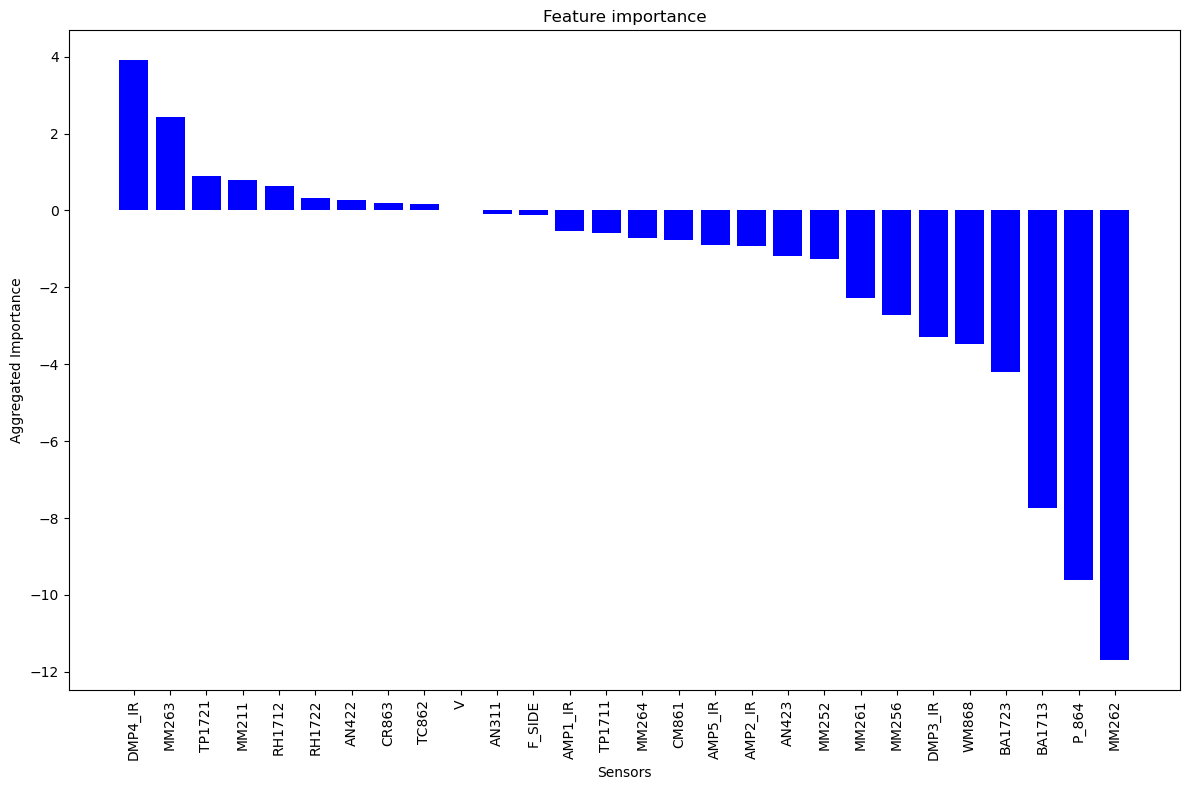

In [25]:
feature_names = merged_train_df.columns

# Create a DataFrame from features and their importances
importance_df = feature_importances_sorted

# Allsensor names
sensors = [
    "AN311", "AN422", "AN423", "TP1721", "RH1722", "BA1723", "TP1711", "RH1712", "BA1713",
    "MM252", "MM261", "MM262", "MM263", "MM264", "MM256", "MM211", "CM861", "CR863", "P_864",
    "TC862", "WM868", "AMP1_IR", "AMP2_IR", "DMP3_IR", "DMP4_IR", "AMP5_IR", "F_SIDE", "V"
]

# Function to extract the base sensor name
def extract_sensor_name(feature_name):
    for sensor in sensors:
        if feature_name.startswith(sensor):
            return sensor
    return "Unknown Sensor"

# Apply the function to get sensor names
importance_df['Sensor'] = importance_df['Feature'].apply(extract_sensor_name)

# Group by Sensor and sum the importances
sensor_importances = importance_df.groupby('Sensor').sum().reset_index()

# Sort the sensors by their importance
sorted_sensor_importances = sensor_importances.sort_values(by='Importance', ascending=False)

# Print the sorted sensor importances
# print(sorted_sensor_importances)

#nplot the sensor importances
plt.figure(figsize=(12, 8))
plt.bar(sorted_sensor_importances['Sensor'], sorted_sensor_importances['Importance'], color='b')
plt.xlabel('Sensors')
plt.ylabel('Aggregated Importance')
plt.title('Feature importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Model without cutter loader features

In [27]:
import pandas as pd

prefixes_to_remove = ['AMP1_IR', 'AMP2_IR', 'DMP3_IR', 'DMP4_IR', 'AMP5_IR', 'F_SIDE', 'V']

# Generate a list of columns to drop
columns_to_drop = [col for col in X_train.columns if any(col.startswith(prefix) for prefix in prefixes_to_remove)]

# Drop these columns from the DataFrame
X_train_new = X_train.drop(columns=columns_to_drop)

# print(X_train_new.shape)
# print(X_train_new.head())


In [28]:
columns_to_drop = [col for col in X_test.columns if any(col.startswith(prefix) for prefix in prefixes_to_remove)]

# Drop these columns from the DataFrame
X_test_new = X_test.drop(columns=columns_to_drop)

# print(X_test_new.shape)
# print(X_test_new.head())

In [65]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_new)
X_test_scaled = scaler.transform(X_test_new)

In [30]:
model = train_svm(X_train_scaled, y_train_encoded, kernel='rbf', C=1.0, class_weight='balanced')

In [31]:
thresholds = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
# Predicting probabilities
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]  # Get probabilities for the positive class

for thresh in thresholds:
    y_pred = np.where(y_pred_prob >= thresh, 1, 0)

    # Calculate metrics using the encoded test labels
    auc_score = roc_auc_score(y_test_encoded, y_pred_prob)
    balanced_acc = balanced_accuracy_score(y_test_encoded, y_pred)
    cm = confusion_matrix(y_test_encoded, y_pred)
    class_report = classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_)
    
    print(f"Threshold: {thresh}")
    print("AUC Score:", auc_score)
    print("Balanced Accuracy:", balanced_acc)
    # print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", class_report)

    cm_percentage = cm / cm.sum(axis=1, keepdims=True) * 100  # Normalizing the confusion matrix to get percentages
    print("Confusion Matrix:\n", cm)
    print("Confusion Matrix (%):\n", np.round(cm_percentage, 2)) 
    print("\n")


Threshold: 0.01
AUC Score: 0.8021268404228014
Balanced Accuracy: 0.6428938096460322
Classification Report:
               precision    recall  f1-score   support

      normal       1.00      0.99      0.99      5042
     warning       0.19      0.29      0.23        34

    accuracy                           0.99      5076
   macro avg       0.59      0.64      0.61      5076
weighted avg       0.99      0.99      0.99      5076

Confusion Matrix:
 [[5000   42]
 [  24   10]]
Confusion Matrix (%):
 [[99.17  0.83]
 [70.59 29.41]]


Threshold: 0.05
AUC Score: 0.8021268404228014
Balanced Accuracy: 0.6023461744872483
Classification Report:
               precision    recall  f1-score   support

      normal       0.99      1.00      1.00      5042
     warning       0.54      0.21      0.30        34

    accuracy                           0.99      5076
   macro avg       0.77      0.60      0.65      5076
weighted avg       0.99      0.99      0.99      5076

Confusion Matrix:
 [[5036   

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa

In [67]:
### Linear kernal

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, balanced_accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder


def train_svm_linear(X, y, C=1.0, class_weight=None):
    # Initialize and train the SVM classifier with a linear kernel
    model = SVC(kernel='linear', C=C, class_weight=class_weight, random_state=42, probability=True)
    model.fit(X, y)
    return model

# Encoder to convert string labels to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Train the SVM
model_linear = train_svm_linear(X_train_scaled, y_train_encoded, C=1.0, class_weight='balanced')


In [68]:
thresholds = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
# Predicting probabilities
y_pred_prob = model_linear.predict_proba(X_test_scaled)[:, 1]  # Get probabilities for the positive class

for thresh in thresholds:
    y_pred = np.where(y_pred_prob >= thresh, 1, 0)

    # Calculate metrics using the encoded test labels
    auc_score = roc_auc_score(y_test_encoded, y_pred_prob)
    balanced_acc = balanced_accuracy_score(y_test_encoded, y_pred)
    cm = confusion_matrix(y_test_encoded, y_pred)
    class_report = classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_)
    
    print(f"Threshold: {thresh}")
    print("AUC Score:", auc_score)
    print("Balanced Accuracy:", balanced_acc)
    # print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", class_report)

    cm_percentage = cm / cm.sum(axis=1, keepdims=True) * 100  # Normalizing the confusion matrix to get percentages
    print("Confusion Matrix:\n", cm)
    print("Confusion Matrix (%):\n", np.round(cm_percentage, 2)) 
    print("\n")


Threshold: 0.01
AUC Score: 0.7981805772685908
Balanced Accuracy: 0.7329316097720326
Classification Report:
               precision    recall  f1-score   support

      normal       1.00      0.88      0.93      5042
     warning       0.03      0.59      0.06        34

    accuracy                           0.88      5076
   macro avg       0.51      0.73      0.50      5076
weighted avg       0.99      0.88      0.93      5076

Confusion Matrix:
 [[4425  617]
 [  14   20]]
Confusion Matrix (%):
 [[87.76 12.24]
 [41.18 58.82]]


Threshold: 0.05
AUC Score: 0.7981805772685908
Balanced Accuracy: 0.6935856452854843
Classification Report:
               precision    recall  f1-score   support

      normal       1.00      0.98      0.99      5042
     warning       0.10      0.41      0.16        34

    accuracy                           0.97      5076
   macro avg       0.55      0.69      0.57      5076
weighted avg       0.99      0.97      0.98      5076

Confusion Matrix:
 [[4918  1